In [124]:
# importing necessary librarys
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
import keras
import scikeras
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.neural_network import MLPRegressor
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler



# Data Processing

---
### 2022
---

In [6]:
# reading given data and visualizing it
dfBLN = pd.read_csv("2021\\JAR_FA_BLNS_2022.csv",sep=',')
dfBLN.head(2)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data
0,302635624,"UAB ""Verslo krepšelis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),01/01/2021,31/12/2021,21/10/2022,2884.0,12.0,0.0,2896.0,01/03/2023
1,304715624,"UAB ""Donstone""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),01/01/2021,31/12/2021,04/05/2022,5831.0,157443.0,52022.0,111252.0,01/03/2023


In [7]:
# reading given data and visualizing it
dfPLNA = pd.read_csv("2021\\JAR_FA_PLNA_2022.csv",sep=',')
dfPLNA.head(2)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data
0,301011561,"UAB ""Rustela""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,01/01/2021,31/12/2021,02/01/2022,-91.0,-91.0,NaN,01/03/2023
1,303641352,"UAB ""Globali technologija""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,01/01/2021,31/12/2021,27/05/2022,0.0,0.0,NaN,01/03/2023


In [8]:
# reading given data and visualizing it
dfRating = pd.read_csv("2021\\ImoniuReitingai2019-2021.csv",sep=',')
dfRating.head(2)

,obj_kodas,Company Reg. No.: Business Name,Company Reg. No.: Name from Register,Year (as Number),laikotarpis_nuo,Till Date,Annual Rating Value,Annual Rating Group
0,302580277,"8DEVICES, UAB",UAB 8DEVICES,2021,01/01/2021,31/12/2021,2.75,C
1,302941304,"JUSPA, UAB","UŽDAROJI AKCIN? BENDROV? ""JUSPA""",2021,01/01/2021,31/12/2021,1.93,B


In [9]:
df1 = pd.merge(dfBLN, dfPLNA, on=["obj_kodas","laikotarpis_nuo"], how="inner")
df1.head(2)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,template_id_x,template_name_x,standard_id_x,standard_name_x,...,template_id_y,template_name_y,standard_id_y,standard_name_y,laikotarpis_iki_y,reg_date_y,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data_y
0,302635624,"UAB ""Verslo krepšelis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),...,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),31/12/2021,21/10/2022,NaN,-12.0,NaN,01/03/2023
1,304715624,"UAB ""Donstone""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,31/12/2021,04/05/2022,4595.0,4360.0,101058.0,01/03/2023


In [10]:
# Drop multiple columns
df1 = df1.drop(['template_id_x', 'template_name_x', 'standard_id_x', 'standard_name_x', 'template_id_y', 'standard_id_y','stat_pav_y','template_name_y','standard_name_y','laikotarpis_iki_y','reg_date_y','formavimo_data_x','obj_pav_y','form_kodas_y','form_pav_y','stat_statusas_y'], axis=1)


In [11]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df1.head(2)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,laikotarpis_nuo,laikotarpis_iki_x,reg_date_x,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data_y
0,302635624,"UAB ""Verslo krepšelis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,01/01/2021,31/12/2021,21/10/2022,2884.0,12.0,0.0,2896.0,NaN,-12.0,NaN,01/03/2023
1,304715624,"UAB ""Donstone""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,01/01/2021,31/12/2021,04/05/2022,5831.0,157443.0,52022.0,111252.0,4595.0,4360.0,101058.0,01/03/2023


In [12]:
df = dfRating.merge(df1, on=["obj_kodas","laikotarpis_nuo"], how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   obj_kodas                             2232 non-null   int64  
 1   Company Reg. No.: Business Name       2176 non-null   object 
 2   Company Reg. No.: Name from Register  2231 non-null   object 
 3   Year (as Number)                      2232 non-null   int64  
 4   laikotarpis_nuo                       2232 non-null   object 
 5   Till Date                             2232 non-null   object 
 6   Annual Rating Value                   2232 non-null   float64
 7   Annual Rating Group                   2232 non-null   object 
 8   obj_pav_x                             2232 non-null   object 
 9   form_kodas_x                          2232 non-null   int64  
 10  form_pav_x                            2232 non-null   object 
 11  stat_statusas_x  

In [13]:
# Drop rows with NaN values in both 'X' and 'Y' columns
df = df[~(df['nuosavas_kapitalas'].isna() | df['mok_sumos_ir_isipareigojimai'].isna() | df['ilgalaikis_turtas'].isna() | df['trumpalaikis_turtas'].isna() | df['pelnas_pries_apmokestinima'].isna() | df['grynasis_pelnas'].isna() | df['pardavimo_pajamos'].isna())]
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919 entries, 0 to 1918
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   obj_kodas                             1919 non-null   int64  
 1   Company Reg. No.: Business Name       1875 non-null   object 
 2   Company Reg. No.: Name from Register  1918 non-null   object 
 3   Year (as Number)                      1919 non-null   int64  
 4   laikotarpis_nuo                       1919 non-null   object 
 5   Till Date                             1919 non-null   object 
 6   Annual Rating Value                   1919 non-null   float64
 7   Annual Rating Group                   1919 non-null   object 
 8   obj_pav_x                             1919 non-null   object 
 9   form_kodas_x                          1919 non-null   int64  
 10  form_pav_x                            1919 non-null   object 
 11  stat_statusas_x  

-------
### 2021
-------

In [14]:
# reading given data and visualizing it
dfBLN = pd.read_csv("2020\\JAR_FA_RODIKLIAI_PLNA_2021.csv",sep=',')
dfBLN.head(2)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data
0,305390322,"UAB ""Klaineda""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),11/12/2019,31/12/2019,27/05/2021,NaN,0.0,NaN,01/03/2023
1,305213076,"UAB ""Danosta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),18/07/2019,31/12/2019,08/09/2021,NaN,-8042.0,NaN,01/03/2023


In [15]:
# reading given data and visualizing it
dfPLNA = pd.read_csv("2020\\JAR_FA_RODIKLIAI_BLNS_2021.csv",sep=',')
dfPLNA.head(2)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data
0,303503376,"MB ""Edva ir ko""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,01/01/2020,31/12/2020,26/04/2021,34663.0,NaN,77286.0,49060.0,01/03/2023
1,122752323,"Uždaroji akcinė bendrovė ""ELGENA""",310,Uždaroji akcinė bendrovė,1,Reorganizuojamas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),01/01/2017,31/12/2017,13/04/2021,3285.0,4757.0,1374.0,6668.0,01/03/2023


In [16]:
# reading given data and visualizing it
dfRating = pd.read_csv("2020\\ImoniuReitingai2019-2021.csv",sep=',')
dfRating.head(2)

,obj_kodas,Company Reg. No.: Business Name,Company Reg. No.: Name from Register,Year (as Number),laikotarpis_nuo,Till Date,Annual Rating Value,Annual Rating Group
0,302580277,"8DEVICES, UAB",UAB 8DEVICES,2021,01/01/2021,31/12/2021,2.75,C
1,302941304,"JUSPA, UAB","UŽDAROJI AKCIN? BENDROV? ""JUSPA""",2021,01/01/2021,31/12/2021,1.93,B


In [17]:
df1 = pd.merge(dfBLN, dfPLNA, on=["obj_kodas","laikotarpis_nuo"], how="inner")
df1.head(2)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,template_id_x,template_name_x,standard_id_x,standard_name_x,laikotarpis_nuo,laikotarpis_iki_x,reg_date_x,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data_x,obj_pav_y,form_kodas_y,form_pav_y,stat_statusas_y,stat_pav_y,template_id_y,template_name_y,standard_id_y,standard_name_y,laikotarpis_iki_y,reg_date_y,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data_y
0,305390322,"UAB ""Klaineda""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),11/12/2019,31/12/2019,27/05/2021,NaN,0.0,NaN,01/03/2023,"UAB ""Klaineda""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),31/12/2019,27/05/2021,2500.0,0.0,0.0,2500.0,01/03/2023
1,305213076,"UAB ""Danosta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),18/07/2019,31/12/2019,08/09/2021,NaN,-8042.0,NaN,01/03/2023,"UAB ""Danosta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),31/12/2019,08/09/2021,-5542.0,8188.0,0.0,2646.0,01/03/2023


In [18]:
# Drop multiple columns
df1 = df1.drop(['template_id_x', 'template_name_x', 'standard_id_x', 'standard_name_x', 'template_id_y', 'standard_id_y','stat_pav_y','template_name_y','standard_name_y','laikotarpis_iki_y','reg_date_y','formavimo_data_x','obj_pav_y','form_kodas_y','form_pav_y','stat_statusas_y'], axis=1)


In [19]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df1.head(2)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,laikotarpis_nuo,laikotarpis_iki_x,reg_date_x,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data_y
0,305390322,"UAB ""Klaineda""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,11/12/2019,31/12/2019,27/05/2021,NaN,0.0,NaN,2500.0,0.0,0.0,2500.0,01/03/2023
1,305213076,"UAB ""Danosta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,18/07/2019,31/12/2019,08/09/2021,NaN,-8042.0,NaN,-5542.0,8188.0,0.0,2646.0,01/03/2023


In [20]:
df2020 = dfRating.merge(df1, on=["obj_kodas","laikotarpis_nuo"], how='inner')
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   obj_kodas                             2287 non-null   int64  
 1   Company Reg. No.: Business Name       2216 non-null   object 
 2   Company Reg. No.: Name from Register  2286 non-null   object 
 3   Year (as Number)                      2287 non-null   int64  
 4   laikotarpis_nuo                       2287 non-null   object 
 5   Till Date                             2287 non-null   object 
 6   Annual Rating Value                   2287 non-null   float64
 7   Annual Rating Group                   2287 non-null   object 
 8   obj_pav_x                             2287 non-null   object 
 9   form_kodas_x                          2287 non-null   int64  
 10  form_pav_x                            2287 non-null   object 
 11  stat_statusas_x  

In [21]:
# Drop rows with NaN values in both 'X' and 'Y' columns
df2020 = df2020[~(df2020['nuosavas_kapitalas'].isna() | df2020['mok_sumos_ir_isipareigojimai'].isna() | df2020['ilgalaikis_turtas'].isna() | df2020['trumpalaikis_turtas'].isna() | df2020['pelnas_pries_apmokestinima'].isna() | df2020['grynasis_pelnas'].isna() | df2020['pardavimo_pajamos'].isna())]
df2020.reset_index(drop=True, inplace=True)
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   obj_kodas                             1961 non-null   int64  
 1   Company Reg. No.: Business Name       1908 non-null   object 
 2   Company Reg. No.: Name from Register  1960 non-null   object 
 3   Year (as Number)                      1961 non-null   int64  
 4   laikotarpis_nuo                       1961 non-null   object 
 5   Till Date                             1961 non-null   object 
 6   Annual Rating Value                   1961 non-null   float64
 7   Annual Rating Group                   1961 non-null   object 
 8   obj_pav_x                             1961 non-null   object 
 9   form_kodas_x                          1961 non-null   int64  
 10  form_pav_x                            1961 non-null   object 
 11  stat_statusas_x  

-------
### 2020
-------

In [22]:
# reading given data and visualizing it
dfBLN = pd.read_csv("2019\\JAR_FA_RODIKLIAI_PLNA_2020.csv",sep=',')
dfBLN.head(2)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data
0,304406916,"UAB ""Geostudija""",310,Uždaroji akcin? bendrov?,0,Teisinis stat ne?registruotas,FS0129,"Maž? ir labai maž? ?moni?, netaikan?i? išim?i?...",IST024,PELNO (NUOSTOLI?) ATASKAITA,01/01/2019,31/12/2019,30/04/2020,119356.0,113384.0,182596.0,01/03/2023
1,304064380,"UAB ""Darika""",310,Uždaroji akcin? bendrov?,0,Teisinis stat ne?registruotas,FS0128,"Labai maž? ?moni?, taikan?i? išimtis, finansin...",IST023,PELNO (NUOSTOLI?) ATASKAITA (Trumpa),01/01/2018,31/12/2018,14/06/2020,NaN,479.0,17406.0,01/03/2023


In [23]:
# reading given data and visualizing it
dfPLNA = pd.read_csv("2019\\JAR_FA_RODIKLIAI_BLNS_2020.csv",sep=',')
dfPLNA.head(2)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data
0,303263543,"UAB ""Korneta""",310,Uždaroji akcin? bendrov?,0,Teisinis stat ne?registruotas,FS0129,"Maž? ir labai maž? ?moni?, netaikan?i? išim?i?...",BST124,BALANSAS (Sutrumpintas),01/01/2019,31/12/2019,27/05/2020,-3488.0,11756.0,0.0,8048.0,01/03/2023
1,303080378,"UAB ""Protingesnis Lt""",310,Uždaroji akcin? bendrov?,0,Teisinis stat ne?registruotas,FS0129,"Maž? ir labai maž? ?moni?, netaikan?i? išim?i?...",BST124,BALANSAS (Sutrumpintas),01/01/2019,31/12/2019,13/05/2020,63268.0,112830.0,18106.0,157992.0,01/03/2023


In [24]:
# reading given data and visualizing it
dfRating = pd.read_csv("2019\\ImoniuReitingai2019-2021.csv",sep=',')
dfRating.head(2)

,obj_kodas,Company Reg. No.: Business Name,Company Reg. No.: Name from Register,Year (as Number),laikotarpis_nuo,Till Date,Annual Rating Value,Annual Rating Group
0,302580277,"8DEVICES, UAB",UAB 8DEVICES,2021,01/01/2021,31/12/2021,2.75,C
1,302941304,"JUSPA, UAB","UŽDAROJI AKCIN? BENDROV? ""JUSPA""",2021,01/01/2021,31/12/2021,1.93,B


In [25]:
df1 = pd.merge(dfBLN, dfPLNA, on=["obj_kodas","laikotarpis_nuo"], how="inner")
df1.head(2)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,template_id_x,template_name_x,standard_id_x,standard_name_x,laikotarpis_nuo,laikotarpis_iki_x,reg_date_x,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data_x,obj_pav_y,form_kodas_y,form_pav_y,stat_statusas_y,stat_pav_y,template_id_y,template_name_y,standard_id_y,standard_name_y,laikotarpis_iki_y,reg_date_y,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data_y
0,304406916,"UAB ""Geostudija""",310,Uždaroji akcin? bendrov?,0,Teisinis stat ne?registruotas,FS0129,"Maž? ir labai maž? ?moni?, netaikan?i? išim?i?...",IST024,PELNO (NUOSTOLI?) ATASKAITA,01/01/2019,31/12/2019,30/04/2020,119356.0,113384.0,182596.0,01/03/2023,"UAB ""Geostudija""",310,Uždaroji akcin? bendrov?,0,Teisinis stat ne?registruotas,FS0129,"Maž? ir labai maž? ?moni?, netaikan?i? išim?i?...",BST124,BALANSAS (Sutrumpintas),31/12/2019,30/04/2020,219835.0,22728.0,18230.0,227817.0,01/03/2023
1,304064380,"UAB ""Darika""",310,Uždaroji akcin? bendrov?,0,Teisinis stat ne?registruotas,FS0128,"Labai maž? ?moni?, taikan?i? išimtis, finansin...",IST023,PELNO (NUOSTOLI?) ATASKAITA (Trumpa),01/01/2018,31/12/2018,14/06/2020,NaN,479.0,17406.0,01/03/2023,"UAB ""Darika""",310,Uždaroji akcin? bendrov?,0,Teisinis stat ne?registruotas,FS0128,"Labai maž? ?moni?, taikan?i? išimtis, finansin...",BST122,BALANSAS (Trumpas),31/12/2018,14/06/2020,6721.0,0.0,242.0,6479.0,01/03/2023


In [26]:
# Drop multiple columns
df1 = df1.drop(['template_id_x', 'template_name_x', 'standard_id_x', 'standard_name_x', 'template_id_y', 'standard_id_y','stat_pav_y','template_name_y','standard_name_y','laikotarpis_iki_y','reg_date_y','formavimo_data_x','obj_pav_y','form_kodas_y','form_pav_y','stat_statusas_y'], axis=1)


In [27]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df1.head(2)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,laikotarpis_nuo,laikotarpis_iki_x,reg_date_x,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data_y
0,304406916,"UAB ""Geostudija""",310,Uždaroji akcin? bendrov?,0,Teisinis stat ne?registruotas,01/01/2019,31/12/2019,30/04/2020,119356.0,113384.0,182596.0,219835.0,22728.0,18230.0,227817.0,01/03/2023
1,304064380,"UAB ""Darika""",310,Uždaroji akcin? bendrov?,0,Teisinis stat ne?registruotas,01/01/2018,31/12/2018,14/06/2020,NaN,479.0,17406.0,6721.0,0.0,242.0,6479.0,01/03/2023


In [28]:
df2019 = dfRating.merge(df1, on=["obj_kodas","laikotarpis_nuo"], how='inner')
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   obj_kodas                             1830 non-null   int64  
 1   Company Reg. No.: Business Name       1777 non-null   object 
 2   Company Reg. No.: Name from Register  1830 non-null   object 
 3   Year (as Number)                      1830 non-null   int64  
 4   laikotarpis_nuo                       1830 non-null   object 
 5   Till Date                             1830 non-null   object 
 6   Annual Rating Value                   1830 non-null   float64
 7   Annual Rating Group                   1830 non-null   object 
 8   obj_pav_x                             1830 non-null   object 
 9   form_kodas_x                          1830 non-null   int64  
 10  form_pav_x                            1830 non-null   object 
 11  stat_statusas_x  

In [29]:
# Drop rows with NaN values in both 'X' and 'Y' columns
df2019 = df2019[~(df2019['nuosavas_kapitalas'].isna() | df2019['mok_sumos_ir_isipareigojimai'].isna() | df2019['ilgalaikis_turtas'].isna() | df2019['trumpalaikis_turtas'].isna() | df2019['pelnas_pries_apmokestinima'].isna() | df2019['grynasis_pelnas'].isna() | df2019['pardavimo_pajamos'].isna())]
df2019.reset_index(drop=True, inplace=True)
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   obj_kodas                             1584 non-null   int64  
 1   Company Reg. No.: Business Name       1542 non-null   object 
 2   Company Reg. No.: Name from Register  1584 non-null   object 
 3   Year (as Number)                      1584 non-null   int64  
 4   laikotarpis_nuo                       1584 non-null   object 
 5   Till Date                             1584 non-null   object 
 6   Annual Rating Value                   1584 non-null   float64
 7   Annual Rating Group                   1584 non-null   object 
 8   obj_pav_x                             1584 non-null   object 
 9   form_kodas_x                          1584 non-null   int64  
 10  form_pav_x                            1584 non-null   object 
 11  stat_statusas_x  

# Experiments?

In [30]:
# merge fin data of other Years
MergedFinData = pd.concat([df, df2020, df2019], axis=0, ignore_index=True)

MergedFinData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5464 entries, 0 to 5463
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   obj_kodas                             5464 non-null   int64  
 1   Company Reg. No.: Business Name       5325 non-null   object 
 2   Company Reg. No.: Name from Register  5462 non-null   object 
 3   Year (as Number)                      5464 non-null   int64  
 4   laikotarpis_nuo                       5464 non-null   object 
 5   Till Date                             5464 non-null   object 
 6   Annual Rating Value                   5464 non-null   float64
 7   Annual Rating Group                   5464 non-null   object 
 8   obj_pav_x                             5464 non-null   object 
 9   form_kodas_x                          5464 non-null   int64  
 10  form_pav_x                            5464 non-null   object 
 11  stat_statusas_x  

In [31]:
# List of the 7 column names you want to select
selected_column_names = ['Annual Rating Value','obj_kodas','Year (as Number)','nuosavas_kapitalas', 'mok_sumos_ir_isipareigojimai', 'ilgalaikis_turtas', 'trumpalaikis_turtas', 'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos']

# Create a new DataFrame with the selected columns
dataNoClead = MergedFinData[selected_column_names]

dataNoClead.sample(n=4, random_state=24)

,Annual Rating Value,obj_kodas,Year (as Number),nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos
4913,1.18,152571859,2019,1012587.0,54686.0,628476.0,437460.0,43246.0,36662.0,728421.0
3822,2.81,123275330,2020,42884.0,378935.0,0.0,421819.0,25889.0,22006.0,314297.0
658,1.42,303266379,2021,292929.0,248782.0,36009.0,505702.0,199441.0,169018.0,1934776.0
2486,2.20,121191079,2020,42573851.0,9258294.0,35612932.0,16167790.0,1410744.0,1305070.0,5688865.0


In [32]:
# rename column so would be easier to match in other tables/code
dataNoClead = dataNoClead.rename(columns={'nuosavas_kapitalas':'nuosavas_kapitalas_Equity-NET_WORTH_BSLT00040', 'mok_sumos_ir_isipareigojimai':'mok_sumos_ir_isipareigojimai-AMOUNTS_PAYABLE_AND_LIABILITIES_BSLT00055', 'ilgalaikis_turtas':'ilgalaikis_turtas-LONG_TERM_ASSETS_BSLT00001', 'trumpalaikis_turtas':'trumpalaikis_turtas-SHORT_TERM_ASSETS_BSLT00021', 'pelnas_pries_apmokestinima':'pelnas_pries_apmokestinima-PROFIT_(LOSS)_BEFORE_TAX_ISLT00017', 'grynasis_pelnas':'grynasis_pelnas_Profit/loss_of_last_year_BSLT00052', 'pardavimo_pajamos':'pardavimo_pajamos_SALES_ISLT00001'})

In [33]:
dataNoClead['bslt00039'] = dataNoClead['ilgalaikis_turtas-LONG_TERM_ASSETS_BSLT00001'] + dataNoClead['trumpalaikis_turtas-SHORT_TERM_ASSETS_BSLT00021']

In [34]:
dataNoClead['1stAltmanZValue'] = (dataNoClead['trumpalaikis_turtas-SHORT_TERM_ASSETS_BSLT00021'] - dataNoClead['mok_sumos_ir_isipareigojimai-AMOUNTS_PAYABLE_AND_LIABILITIES_BSLT00055']) / dataNoClead['bslt00039']

In [35]:
dataNoClead['EquityToAssetsRatio'] = dataNoClead['nuosavas_kapitalas_Equity-NET_WORTH_BSLT00040'] / dataNoClead['bslt00039']

In [36]:
dataNoClead['4thAltmanZValue'] = dataNoClead['nuosavas_kapitalas_Equity-NET_WORTH_BSLT00040'] / dataNoClead['mok_sumos_ir_isipareigojimai-AMOUNTS_PAYABLE_AND_LIABILITIES_BSLT00055']

In [37]:
dataNoClead['5thAltmanZValue'] = dataNoClead['pardavimo_pajamos_SALES_ISLT00001'] / dataNoClead['bslt00039']

In [38]:
dataNoClead['PartialAltmanZ'] = 1.2 * dataNoClead['1stAltmanZValue'] + 1.4 * dataNoClead['EquityToAssetsRatio'] +  0.6 * dataNoClead['4thAltmanZValue'] + 1 * dataNoClead['5thAltmanZValue']

In [39]:
dataNoClead['CurrentRatio'] = dataNoClead['trumpalaikis_turtas-SHORT_TERM_ASSETS_BSLT00021'] / dataNoClead['mok_sumos_ir_isipareigojimai-AMOUNTS_PAYABLE_AND_LIABILITIES_BSLT00055']

In [40]:
dataNoClead['NetProfitMargin'] = dataNoClead['pelnas_pries_apmokestinima-PROFIT_(LOSS)_BEFORE_TAX_ISLT00017'] / dataNoClead['pardavimo_pajamos_SALES_ISLT00001']

In [41]:
dataNoClead['ROCE'] = dataNoClead['pelnas_pries_apmokestinima-PROFIT_(LOSS)_BEFORE_TAX_ISLT00017'] / (dataNoClead['nuosavas_kapitalas_Equity-NET_WORTH_BSLT00040'] + dataNoClead['mok_sumos_ir_isipareigojimai-AMOUNTS_PAYABLE_AND_LIABILITIES_BSLT00055'])

In [42]:
dataNoClead['AccountsPayableTurnovers'] = (dataNoClead['mok_sumos_ir_isipareigojimai-AMOUNTS_PAYABLE_AND_LIABILITIES_BSLT00055'] / dataNoClead['pardavimo_pajamos_SALES_ISLT00001']) * 365

In [43]:
dataNoClead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5464 entries, 0 to 5463
Data columns (total 20 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Annual Rating Value                                                     5464 non-null   float64
 1   obj_kodas                                                               5464 non-null   int64  
 2   Year (as Number)                                                        5464 non-null   int64  
 3   nuosavas_kapitalas_Equity-NET_WORTH_BSLT00040                           5464 non-null   float64
 4   mok_sumos_ir_isipareigojimai-AMOUNTS_PAYABLE_AND_LIABILITIES_BSLT00055  5464 non-null   float64
 5   ilgalaikis_turtas-LONG_TERM_ASSETS_BSLT00001                            5464 non-null   float64
 6   trumpalaikis_turtas-SHORT_TERM_ASSETS_BSLT00021                         5464 non

In [44]:
# Replace positive infinity with NaN
dataNoClead.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop NaN values (which now include former infinity values)
dataNoClead.dropna(inplace=True)
dataNoClead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5452 entries, 0 to 5463
Data columns (total 20 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Annual Rating Value                                                     5452 non-null   float64
 1   obj_kodas                                                               5452 non-null   int64  
 2   Year (as Number)                                                        5452 non-null   int64  
 3   nuosavas_kapitalas_Equity-NET_WORTH_BSLT00040                           5452 non-null   float64
 4   mok_sumos_ir_isipareigojimai-AMOUNTS_PAYABLE_AND_LIABILITIES_BSLT00055  5452 non-null   float64
 5   ilgalaikis_turtas-LONG_TERM_ASSETS_BSLT00001                            5452 non-null   float64
 6   trumpalaikis_turtas-SHORT_TERM_ASSETS_BSLT00021                         5452 non-null

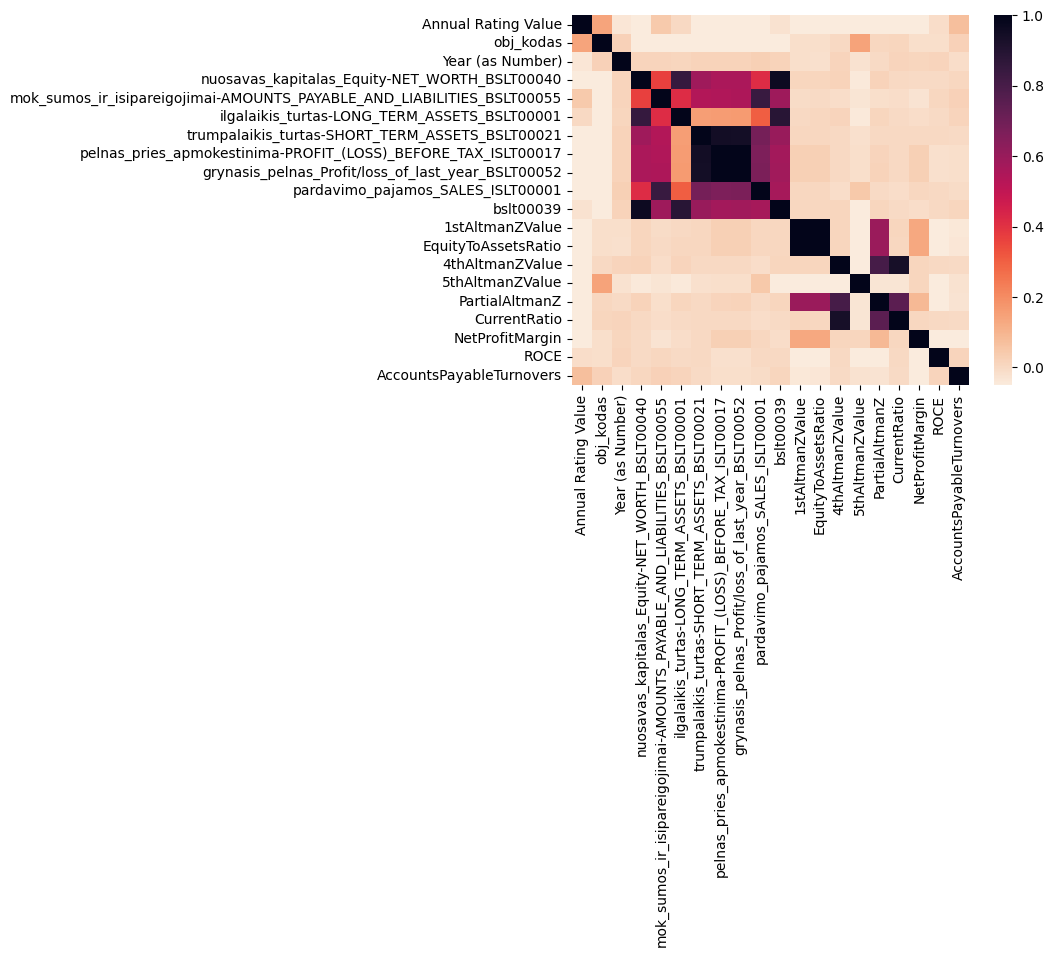

In [45]:
cmap = sns.cm.rocket_r

ax = sns.heatmap(dataNoClead.corr(),
                 annot=False,
                 fmt=".3f",
                 vmin=-0.05,
                 cmap = cmap)

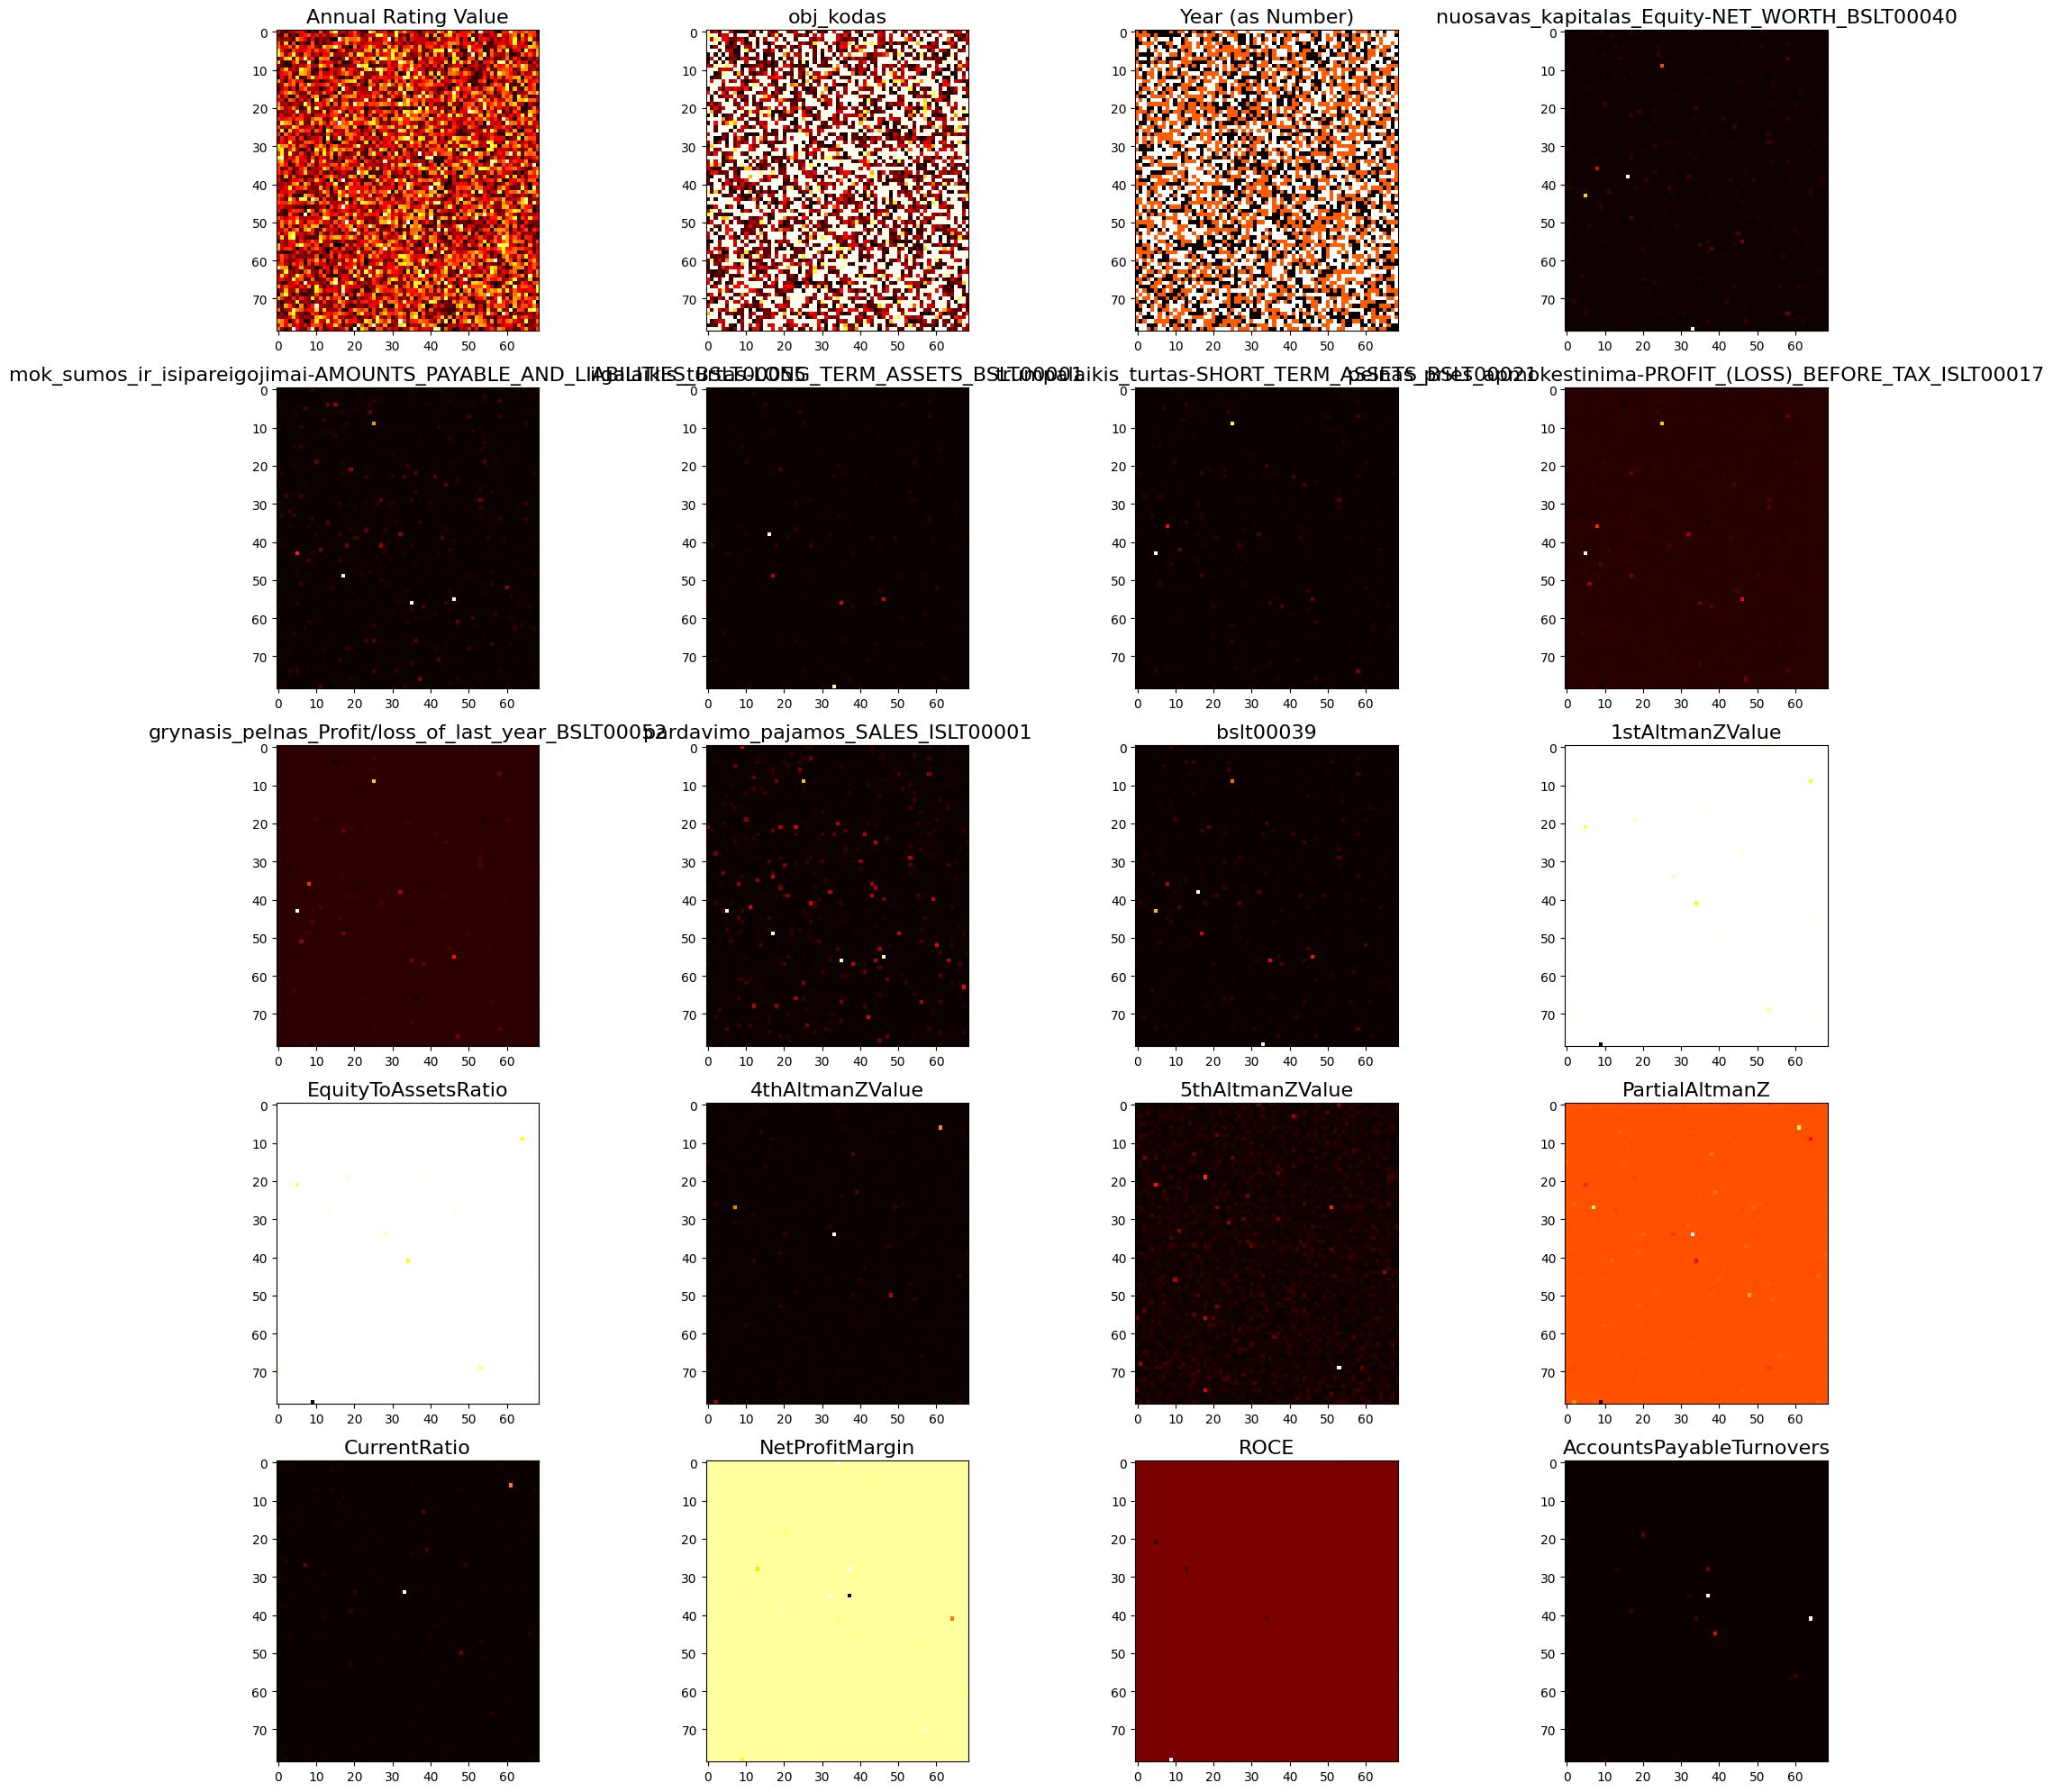

In [46]:
# Example DataFrame

df = dataNoClead.sample(n=5451)

# Normalize the data to 0-1
df_normalized = (df - df.min()) / (df.max() - df.min())

# Create a subplot for each column
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i in range(5):
    for j in range(4):
        # Get the column data
        col_index = i*4 + j
        data = df_normalized.iloc[:, col_index]
        
        # Reshape the data to a 2D array
        data_2d = np.reshape(data.values, (79, 69))
        
        # Create a pixel map using imshow
        im = axs[i, j].imshow(data_2d, cmap='hot', interpolation='nearest')
        
        # Set the title to the column name
        axs[i, j].set_title(df.columns[col_index], fontsize=16)

# Improve layout
plt.tight_layout()
plt.show()



In [47]:
# Delete multiple columns
dataNoClead = dataNoClead.drop(['obj_kodas', 'Year (as Number)'], axis=1)

#sns.pairplot(dataNoClead, kind="scatter")
#plt.show()


In [48]:
# Select the columns from the 2nd to the 8th
selected_columns = dataNoClead.columns[1:]

# Calculate Z-scores for the selected columns
z_scores = np.abs((dataNoClead[selected_columns] - dataNoClead[selected_columns].mean()) / dataNoClead[selected_columns].std())

# Remove outliers in the selected columns
data = dataNoClead[(z_scores < 0.6).all(axis=1)]  # Adjust the threshold as needed

# Print the info of the cleaned data
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3495 entries, 0 to 5463
Data columns (total 18 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Annual Rating Value                                                     3495 non-null   float64
 1   nuosavas_kapitalas_Equity-NET_WORTH_BSLT00040                           3495 non-null   float64
 2   mok_sumos_ir_isipareigojimai-AMOUNTS_PAYABLE_AND_LIABILITIES_BSLT00055  3495 non-null   float64
 3   ilgalaikis_turtas-LONG_TERM_ASSETS_BSLT00001                            3495 non-null   float64
 4   trumpalaikis_turtas-SHORT_TERM_ASSETS_BSLT00021                         3495 non-null   float64
 5   pelnas_pries_apmokestinima-PROFIT_(LOSS)_BEFORE_TAX_ISLT00017           3495 non-null   float64
 6   grynasis_pelnas_Profit/loss_of_last_year_BSLT00052                      3495 non-null

In [49]:
Q1 = dataNoClead.quantile(0.25)
Q3 = dataNoClead.quantile(0.75)
IQR = Q3 - Q1
theHigherTheMoreDataKeep = 2.05
data = dataNoClead[~((dataNoClead < (Q1 - theHigherTheMoreDataKeep * IQR)) | (dataNoClead > (Q3 + theHigherTheMoreDataKeep * IQR))).any(axis=1)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3004 entries, 0 to 5462
Data columns (total 18 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Annual Rating Value                                                     3004 non-null   float64
 1   nuosavas_kapitalas_Equity-NET_WORTH_BSLT00040                           3004 non-null   float64
 2   mok_sumos_ir_isipareigojimai-AMOUNTS_PAYABLE_AND_LIABILITIES_BSLT00055  3004 non-null   float64
 3   ilgalaikis_turtas-LONG_TERM_ASSETS_BSLT00001                            3004 non-null   float64
 4   trumpalaikis_turtas-SHORT_TERM_ASSETS_BSLT00021                         3004 non-null   float64
 5   pelnas_pries_apmokestinima-PROFIT_(LOSS)_BEFORE_TAX_ISLT00017           3004 non-null   float64
 6   grynasis_pelnas_Profit/loss_of_last_year_BSLT00052                      3004 non-null

In [50]:
#sns.pairplot(data, kind="scatter")
#plt.show()

## Multiple Linear Regression

In [51]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data[['nuosavas_kapitalas', 'mok_sumos_ir_isipareigojimai', 'ilgalaikis_turtas', 'trumpalaikis_turtas', 'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos']], data['Annual Rating Value'], test_size=0.2, random_state=42)

# # Create and fit a multiple linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)
# print("Mean Squared Error:", mse)
# print("R-squared:", r2)


In [52]:
# # Create a scatter plot with the linear regression line

# # Clip the predicted values to be within the range [1, 5]
# # y_pred_clipped = np.clip(y_pred, 1, 5)
# plt.scatter(X_test['mok_sumos_ir_isipareigojimai'], y_test, label='Data', color='blue')  # You can choose any X variable for the x-axis
# plt.plot(X_test['mok_sumos_ir_isipareigojimai'], y_pred, label='Linear Regression', color='red')  # Same X variable for the x-axis
# plt.xlabel('mok_sumos_ir_isipareigojimai')  # Update the label to match the chosen X variable
# plt.ylabel('Annual Rating Value')
# plt.legend()
# plt.title('Linear Regression Example')
# plt.show()

In [53]:
# # Test the model on a single set of input variables
# new_input_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])  # Replace these values with your input data
# predicted_y8 = model.predict(new_input_data)  # Predict Y8 based on the input data

# print("Predicted Y8 for the new input data:")
# print(predicted_y8[0])  # Print the single predicted value

In [54]:
# # Test the model on a single set of input variables
# new_input_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])  # Replace these values with your input data
# predicted_y8 = model.predict(new_input_data)  # Predict Y8 based on the input data

# print("Predicted Y8 for the new input data:")
# print(predicted_y8[0])  # Print the single predicted value

## Polynomial Linear Regression

In [55]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data[['nuosavas_kapitalas', 'mok_sumos_ir_isipareigojimai', 'ilgalaikis_turtas', 'trumpalaikis_turtas', 'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos']], data['Annual Rating Value'], test_size=0.2, random_state=42)

# # Create Polynomial Features
# poly = PolynomialFeatures(degree=2)  # You can choose the degree you want
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# # Create and fit a Polynomial Linear Regression model
# model = LinearRegression()
# model.fit(X_train_poly, y_train)

# # Make predictions on the test data
# y_pred = model.predict(X_test_poly)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

In [56]:
# # Create a scatter plot with the linear regression line
# # Clip the predicted values to be within the range [1, 5]
# y_pred_clipped = np.clip(y_pred, 1, 5)
# plt.scatter(X_test['pardavimo_pajamos'], y_test, label='Data', color='blue')  # You can choose any X variable for the x-axis
# plt.plot(X_test['pardavimo_pajamos'], y_pred_clipped, label='Linear Regression', color='red')  # Same X variable for the x-axis
# plt.xlabel('pardavimo_pajamos')  # Update the label to match the chosen X variable
# plt.ylabel('Annual Rating Value')
# plt.legend()
# plt.title('Linear Regression Example')
# plt.show()

In [57]:
# # Test the model on new data
# new_input_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])  # Replace these values with your input data
# new_input_data_poly = poly.transform(new_input_data)  # Transform the input data to include polynomial features
# predicted_y8 = model.predict(new_input_data_poly)  # Predict Y8 based on the input data

# # Clip the predicted value to be within the range [1, 5]
# predicted_y8_clipped = np.clip(predicted_y8, 1, 5)

# print("Predicted Y8 for the new input data (clipped):")
# print(predicted_y8_clipped[0])  # Print the single predicted value (clipped to [1, 5])

In [58]:
# # Test the model on new data
# new_input_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])  # Replace these values with your input data
# new_input_data_poly = poly.transform(new_input_data)  # Transform the input data to include polynomial features
# predicted_y8 = model.predict(new_input_data_poly)  # Predict Y8 based on the input data

# # Clip the predicted value to be within the range [1, 5]
# predicted_y8_clipped = np.clip(predicted_y8, 1, 5)

# print("Predicted Y8 for the new input data (clipped):")
# print(predicted_y8_clipped[0])  # Print the single predicted value (clipped to [1, 5])

## Multi-Layer Perceptron (MLP)

In [72]:
# Dataset 
df = data

# Dataset
X = df.iloc[:, 1:].values  # Input features from 2nd column to the end
y = df.iloc[:, 0].values   # Output is the first column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define the grid search parameters
param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (10,), (20,20), (10,10)],
              'activation': ['tanh', 'relu', 'logistic', 'identity'],
              'solver': ['sgd', 'adam', 'lbfgs'],
              'alpha': [0.0001, 0.05, 0.01, 0.001, 0.1, 0.3, 0.5],
              'learning_rate': ['constant', 'adaptive', 'invscaling']}

mlp = MLPRegressor(max_iter=200)

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3, scoring=mse_scorer, error_score='raise')
grid_result = grid.fit(X_train, y_train)

# Create a DataFrame from the grid search results
results_df = pd.DataFrame(grid_result.cv_results_)

# Calculate metrics for each parameter combination
for i, params in enumerate(results_df['params']):
    mlp.set_params(**params)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = sqrt(mse)
    results_df.loc[i, 'mse'] = mse
    results_df.loc[i, 'mae'] = mae
    results_df.loc[i, 'r2'] = r2
    results_df.loc[i, 'rmse'] = rmse

# Save the results to a CSV file
results_df.to_csv('MLP_grid_search_results.csv', index=False)


C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_m

In [75]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.060869 using {'activation': 'logistic', 'alpha': 0.5, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}


## Artificial Neural Network (ANN)

In [132]:
# ~3,5 val
# Assuming 'data' is a pandas DataFrame
df = data

X = df.iloc[:, 1:].values  # Input features from 2nd column to the end
y = df.iloc[:, 0].values   # Output is the first column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# # Define custom optimizers
sgd_001 = keras.optimizers.legacy.SGD(learning_rate=0.01)
sgd_0001 = keras.optimizers.legacy.SGD(learning_rate=0.001)
adam_001 = keras.optimizers.legacy.Adam(learning_rate=0.01)
adam_0001 = keras.optimizers.legacy.Adam(learning_rate=0.001)
sgd_005 = keras.optimizers.legacy.SGD(learning_rate=0.05)
sgd_01 = keras.optimizers.legacy.SGD(learning_rate=0.1)
adam_005 = keras.optimizers.legacy.Adam(learning_rate=0.05)
adam_01 = keras.optimizers.legacy.Adam(learning_rate=0.1)

# # Define the grid search parameters
# param_grid = {'batch_size': [10, 20, 40, 60, 80, 100, 140, 220],
#               'epochs': [20, 50, 100, 120, 150],
#               'optimizer': ["sgd_001","sgd_0001", "adam_001", "adam_0001","sgd_005","sgd_01", "adam_005", "adam_01"],
#               'activation': ['relu', 'tanh', 'sigmoid']}

# Define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100, 140, 220],
              'epochs': [180, 220, 280],
              'optimizer': ["sgd_001","sgd_0001", "adam_001", "adam_0001","sgd_005","sgd_01", "adam_005", "adam_01"],
              'activation': ['relu', 'tanh', 'sigmoid']}

# Initialize results list
results = []

for batch_size in param_grid['batch_size']:
    for epochs in param_grid['epochs']:
        for optimizer in param_grid['optimizer']:
            for activation in param_grid['activation']:
                if optimizer == 'sgd_001':
                    opt = sgd_001
                elif optimizer == 'sgd_0001':
                    opt = sgd_0001
                elif optimizer == 'adam_001':
                    opt = adam_001
                elif optimizer == 'adam_0001':
                    opt = adam_0001
                elif optimizer == 'sgd_005':
                    opt = sgd_005
                elif optimizer == 'sgd_01':
                    opt = sgd_01
                elif optimizer == 'adam_005':
                    opt = adam_005
                elif optimizer == 'adam_01':
                    opt = adam_01
                model = Sequential()
                model.add(Dense(units=64, activation=activation, input_dim=17))
                model.add(Dense(units=32, activation=activation))
                model.add(Dense(units=1, activation='linear'))  # Assuming rating is a continuous value
                model.compile(optimizer=opt, loss='mean_squared_error')
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                
                # Predicting the Test set results
                y_pred = model.predict(X_test)
                
                # Metrics
                mse = mean_squared_error(y_test, y_pred)
                mae = mean_absolute_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)
                rmse = sqrt(mse)
                
                results.append({'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer, 'activation': activation, 'mse': mse, 'mae': mae, 'r2': r2, 'rmse': rmse})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
with open('ANN_manual_grid_search_results.csv', 'a') as f:
    results_df.to_csv(f, header=f.tell()==0, index=False)



19/19 [==============================] - 0s 1ms/step


In [118]:
# # Replace 'your_dataset.csv' with the actual name of your dataset
# df = data

# # Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
# X = df.iloc[:, 1:].values  # Input features from 2nd column to the end
# y = df.iloc[:, 0].values   # Output is the first column

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# model = Sequential()

# # Adjust the number of units and activation function as needed
# model.add(Dense(units=64, activation='relu', input_dim=17))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=1, activation='linear'))  # Assuming rating is a continuous value

# model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# loss = model.evaluate(X_test, y_test)
# print(f'Mean Squared Error on Test Set: {loss}')

Epoch 1/50
76/76 [==============================] - 1s 3ms/step - loss: 1.3527 - val_loss: 0.2763
Epoch 2/50
76/76 [==============================] - 0s 1ms/step - loss: 0.2036 - val_loss: 0.1552
Epoch 3/50
76/76 [==============================] - 0s 1ms/step - loss: 0.1169 - val_loss: 0.1089
Epoch 4/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0886 - val_loss: 0.0940
Epoch 5/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0789 - val_loss: 0.0875
Epoch 6/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0754 - val_loss: 0.0842
Epoch 7/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0714 - val_loss: 0.0833
Epoch 8/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0699 - val_loss: 0.0812
Epoch 9/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0686 - val_loss: 0.0798
Epoch 10/50
76/76 [==============================] - 0s 1ms/step - loss: 0.0664 - val_loss: 0.0794
Epoch 11/50
76/76 [

In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Make predictions on the new data
# predicted_rating = model.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')

In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Make predictions on the new data
# predicted_rating = model.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')

## Random Forest 


In [ ]:
# # Dataset 
# df = data

# # Dataset
# X = df.iloc[:, 1:].values  # Input features from 2nd column to the end
# y = df.iloc[:, 0].values   # Output is the first column

# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize input features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Build Random Forest model
# rf_model = RandomForestRegressor(random_state=42)

# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'n_estimators': [100, 200, 300, 500, 750, 1000],
#     'max_depth': [None, 5, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 20, 35],
#     'min_samples_leaf': [1, 2, 4, 8]
# }

# # Define the metrics for evaluating models
# scoring = {
#     'mse': make_scorer(mean_squared_error, greater_is_better=False),
#     'mae': make_scorer(mean_absolute_error, greater_is_better=False),
#     'r2': make_scorer(r2_score),
#     'rmse': make_scorer(lambda y_true, y_pred: sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)
# }

# # Set up the grid search
# grid_search = GridSearchCV(
#     estimator=rf_model,
#     param_grid=hyperparameter_grid,
#     cv=3,
#     scoring=scoring,
#     refit='mse',
#     verbose=1,
#     n_jobs=-1,
#     return_train_score=True
# )

# # Conduct the grid search
# grid_search.fit(X_train, y_train)

# # Get the results of the grid search
# results = grid_search.cv_results_

# # Create a DataFrame to store the results
# results_df = pd.DataFrame(results)

# # Save the results to a CSV file
# results_df.to_csv('grid_search_results.csv', index=False)

# # Print the results for each combination of parameters
# for i in range(len(results['params'])):
#     print(f"Parameters: {results['params'][i]}")
#     print(f"MSE: {-results['mean_test_mse'][i]}")
#     print(f"MAE: {-results['mean_test_mae'][i]}")
#     print(f"R2: {results['mean_test_r2'][i]}")
#     print(f"RMSE: {-results['mean_test_rmse'][i]}")
#     print()


Fitting 3 folds for each of 600 candidates, totalling 1800 fits
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 0.06294289335830211
MAE: 0.19345925925925925
R2: 0.8732852419650148
RMSE: 0.2508419654043766

Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MSE: 0.06250798822617559
MAE: 0.19249648356221385
R2: 0.8741657816151104
RMSE: 0.24997264073119138

Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
MSE: 0.06239470744855968
MAE: 0.19228368705784438
R2: 0.8743938172475866
RMSE: 0.2497490880944622

Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
MSE: 0.062143666388181494
MAE: 0.1918940074906367
R2: 0.8748992838851354
RMSE: 0.24924046894064253

Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 750}
MSE: 0.06210640288232302
MAE: 0.191905

In [ ]:
# # Get the best parameters
# best_parameters = grid_search.best_params_

# # Train the Random Forest model with the best parameters
# rf_model_best = RandomForestRegressor(**best_parameters, random_state=42)
# rf_model_best.fit(X_train, y_train)

# # Make predictions on test set
# y_pred = rf_model_best.predict(X_test)

# # Evaluate model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# rmse = sqrt(mse)

# print(f'Best Parameters: {best_parameters}')
# print(f'Mean Squared Error on Test Set: {mse}')
# print(f'Mean Absolute Error on Test Set: {mae}')
# print(f'R-squared on Test Set: {r2}')
# print(f'Root Mean Squared Error on Test Set: {rmse}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 750}
Mean Squared Error on Test Set: 0.07021875119256114
Mean Absolute Error on Test Set: 0.2064064412768981
R-squared on Test Set: 0.8553799132277975
Root Mean Squared Error on Test Set: 0.2649882095349926


In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Make predictions on the new data
# predicted_rating = rf_model.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Rating for the New Data: {predicted_rating[0]}')

Predicted Rating for the New Data: 3.7438999999999965


In [ ]:

# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Make predictions on the new data
# predicted_rating = rf_model.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Rating for the New Data: {predicted_rating[0]}')

Predicted Rating for the New Data: 1.7041


## Long Short-Term Memory (LSTM) 

In [ ]:
# # Assuming you have a dataset with 8 columns and named 'your_dataset.csv'
# df = data

# # Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
# X = df.iloc[:, :7].values  # Input features
# y = df.iloc[:, 7].values   # Output (rating)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the input features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Reshape the input data for LSTM (assuming a time series sequence)
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(units=64, activation='relu', input_shape=(1, 7)))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=1, activation='linear'))
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# # Evaluate the model on the test set
# loss = model.evaluate(X_test, y_test)
# print(f'Mean Squared Error on Test Set: {loss}')

Epoch 1/50
95/95 [==============================] - 1s 4ms/step - loss: 3.7013 - val_loss: 0.9867
Epoch 2/50
95/95 [==============================] - 0s 2ms/step - loss: 1.2306 - val_loss: 0.6488
Epoch 3/50
95/95 [==============================] - 0s 2ms/step - loss: 0.7516 - val_loss: 0.5670
Epoch 4/50
95/95 [==============================] - 0s 2ms/step - loss: 0.5786 - val_loss: 0.4906
Epoch 5/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4846 - val_loss: 0.4414
Epoch 6/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4159 - val_loss: 0.4007
Epoch 7/50
95/95 [==============================] - 0s 2ms/step - loss: 0.3689 - val_loss: 0.3772
Epoch 8/50
95/95 [==============================] - 0s 2ms/step - loss: 0.3347 - val_loss: 0.3445
Epoch 9/50
95/95 [==============================] - 0s 2ms/step - loss: 0.3102 - val_loss: 0.3212
Epoch 10/50
95/95 [==============================] - 0s 2ms/step - loss: 0.2885 - val_loss: 0.3091
Epoch 11/50
95/95 [

In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Reshape the new data for prediction
# scaled_new_data = scaled_new_data.reshape(1, 1, 7)

# # Make predictions on the new data
# predicted_rating = model.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')

1/1 [==============================] - 0s 124ms/step
Predicted Rating for the New Data: 3.0300607681274414


In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[15974000.0, 13697000.0, 2890000.0, 30810000.0, 4492000.0, 4552000.0, 512128000.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Reshape the new data for prediction
# scaled_new_data = scaled_new_data.reshape(1, 1, 7)

# # Make predictions on the new data
# predicted_rating = model.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')


1/1 [==============================] - 0s 16ms/step
Predicted Rating for the New Data: 1.517765998840332


## K-Means

In [ ]:
# # Assuming you have a dataset with 8 columns and named 'your_dataset.csv'
# df = data

# # Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
# X = df.iloc[:, :7].values  # Input features

# # Standardize the input features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the dataset into training and testing sets
# X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# # Assuming you want to cluster the data into, for example, 3 clusters
# n_clusters = 5

# # Build the K-Means model
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# # Fit the model on the training data
# kmeans.fit(X_train)

# # Predict cluster labels for the test data
# test_labels = kmeans.predict(X_test)

C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Predict the cluster for the new data
# new_data_cluster = kmeans.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Cluster for the New Data: {new_data_cluster[0]}')

Predicted Cluster for the New Data: 0


In [ ]:
# # Now, let's say you have new data for prediction (7 columns)
# new_data = np.array([[15974000.0, 13697000.0, 2890000.0, 30810000.0, 4492000.0, 4552000.0, 512128000.0]])

# # Standardize the new data using the same scaler
# scaled_new_data = scaler.transform(new_data)

# # Predict the cluster for the new data
# new_data_cluster = kmeans.predict(scaled_new_data)

# # Output the result
# print(f'Predicted Cluster for the New Data: {new_data_cluster[0]}')

Predicted Cluster for the New Data: 4


C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

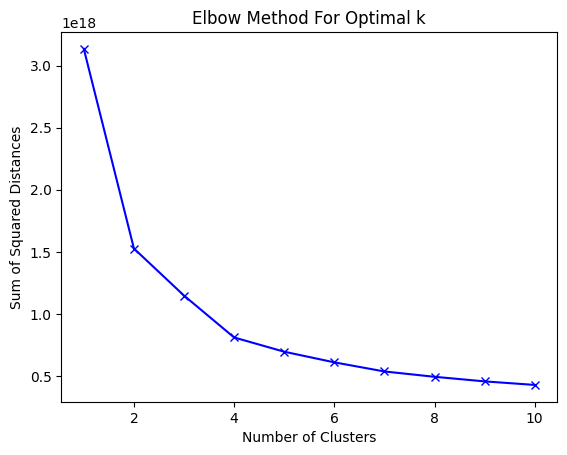

In [ ]:
# # Assuming X is your standardized data
# sum_of_squared_distances = []
# K = range(1, 11)

# for k in K:
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(X)
#     sum_of_squared_distances.append(kmeans.inertia_)

# plt.plot(K, sum_of_squared_distances, 'bx-')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Sum of Squared Distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()